In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import regex as re
# from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# pd.set_option('max_rows', 70)

In [3]:
df = pd.read_csv('./mbti_full_pull.csv')

# EDA

**It should go without saying that I consolidated much of my code after performing EDA. All of the following has been organized for the purpose of being read by a third person.**

In [4]:
df.head()

,author_flair_text,body,subreddit
0,INTJ,Knowing you're in INTJ is a tool for you to us...,intj
1,INTJ,You are truly an enlightened mastermind.,intj
2,"INFJ, 26F",You should :) it will help if you have a down ...,infj
3,INTP,I watch a bit of everything (including hentai)...,INTP
4,INTJ,I don't know if I would count this as a pet pe...,intj


In [5]:
df = df.drop(columns = 'subreddit')

In [6]:
df.shape

(1794016, 2)

In [7]:
df.isnull().sum()

author_flair_text     0
body                 55
dtype: int64

In [8]:
df = df.dropna() # Dropping 55 rows with null values

In [9]:
print(df.shape)

(1793961, 2)


In [10]:
# Dropping rows based on string characters in "author_flair_text" column

df = df.drop(df[df['author_flair_text'].str.contains('either')].index) # dropping "either"
df = df.drop(df[df['author_flair_text'].str.contains('and')].index) # dropping "and"
df = df.drop(df[df['author_flair_text'].str.contains('or')].index) # dropping "or"
df = df.drop(df[df['author_flair_text'].str.contains('probable')].index) # dropping "probable"
df = df.drop(df[df['author_flair_text'].str.contains('possible')].index) # dropping "possible"
df = df.drop(df[df['author_flair_text'].str.contains('hybrid')].index) # dropping "hybrid"
df = df.drop(df[df['author_flair_text'].str.contains('.com')].index) # dropping ".com"
df = df.drop(df[df['author_flair_text'].str.contains('North Rhine-Westphalia')].index) # dropping "North Rhine-Westphalia"
print(df.shape)

(1708945, 2)


# Merging same personality types that were entered differently:

There's probably a way to do this with a function, but copying/pasting took less time than figuring that out would have taken.

In [11]:
infp1 = df[df['author_flair_text'] == 'infp']
infp2 = df[df['author_flair_text'] == 'INFP']
infp3 = df[df['author_flair_text'] == '[infp]']
infp4 = df[df['author_flair_text'] == '[INFP]']

infp_list = [infp1, infp2, infp3, infp4]

infp = pd.concat(infp_list)
infp['author_flair_text'] = 'infp'

infp['author_flair_text'].value_counts()

infp    50425
Name: author_flair_text, dtype: int64

In [12]:
infj1 = df[df['author_flair_text'] == 'infj']
infj2 = df[df['author_flair_text'] == 'INFJ']
infj3 = df[df['author_flair_text'] == '[infj]']
infj4 = df[df['author_flair_text'] == '[INFJ]']

infj_list = [infj1, infj2, infj3, infj4]

infj = pd.concat(infj_list)
infj['author_flair_text'] = 'infj'

infj['author_flair_text'].value_counts()

infj    77283
Name: author_flair_text, dtype: int64

In [13]:
intp1 = df[df['author_flair_text'] == 'intp']
intp2 = df[df['author_flair_text'] == 'INTP']
intp3 = df[df['author_flair_text'] == '[intp]']
intp4 = df[df['author_flair_text'] == '[INTP]']

intp_list = [intp1, intp2, intp3, intp4]

intp = pd.concat(intp_list)
intp['author_flair_text'] = 'intp'

intp['author_flair_text'].value_counts()

intp    376528
Name: author_flair_text, dtype: int64

In [14]:
intj1 = df[df['author_flair_text'] == 'intj']
intj2 = df[df['author_flair_text'] == 'INTJ']
intj3 = df[df['author_flair_text'] == '[intj]']
intj4 = df[df['author_flair_text'] == '[INTJ]']

intj_list = [intj1, intj2, intj3, intj4]

intj = pd.concat(intj_list)
intj['author_flair_text'] = 'intj'

intj['author_flair_text'].value_counts()

intj    331136
Name: author_flair_text, dtype: int64

In [15]:
isfp1 = df[df['author_flair_text'] == 'isfp']
isfp2 = df[df['author_flair_text'] == 'ISFP']
isfp3 = df[df['author_flair_text'] == '[isfp]']
isfp4 = df[df['author_flair_text'] == '[ISFP]']

isfp_list = [isfp1, isfp2, isfp3, isfp4]

isfp = pd.concat(isfp_list)
isfp['author_flair_text'] = 'isfp'

isfp['author_flair_text'].value_counts()

isfp    10468
Name: author_flair_text, dtype: int64

In [16]:
isfj1 = df[df['author_flair_text'] == 'isfj']
isfj2 = df[df['author_flair_text'] == 'ISFJ']
isfj3 = df[df['author_flair_text'] == '[isfj]']
isfj4 = df[df['author_flair_text'] == '[ISFJ]']
isfj5 = df[df['author_flair_text'] == 'ISFJ - Male']
isfj6 = df[df['author_flair_text'] == '[Basic Bitch ISFJ]']
isfj7 = df[df['author_flair_text'] == 'ISFJ - Female']
isfj8 = df[df['author_flair_text'] == 'ISFJ: Team Mom']
isfj9 = df[df['author_flair_text'] == 'ISFJ [Apache Helicopter]']
isfj10 = df[df['author_flair_text'] == "ISFJ - I don't wanna hang out"]

isfj_list = [isfj1, isfj2, isfj3, isfj4, isfj5, isfj6, isfj7, isfj8, isfj9, isfj10]

isfj = pd.concat(isfj_list)
isfj['author_flair_text'] = 'isfj'

isfj['author_flair_text'].value_counts()

isfj    6617
Name: author_flair_text, dtype: int64

In [17]:
istp1 = df[df['author_flair_text'] == 'istp']
istp2 = df[df['author_flair_text'] == 'ISTP']
istp3 = df[df['author_flair_text'] == '[istp]']
istp4 = df[df['author_flair_text'] == '[ISTP]']

istp_list = [istp1, istp2, istp3, istp4]

istp = pd.concat(istp_list)
istp['author_flair_text'] = 'istp'

istp['author_flair_text'].value_counts()

istp    38850
Name: author_flair_text, dtype: int64

In [18]:
istj1 = df[df['author_flair_text'] == 'istj']
istj2 = df[df['author_flair_text'] == 'ISTJ']
istj3 = df[df['author_flair_text'] == '[istj]']
istj4 = df[df['author_flair_text'] == '[ISTJ]']

istj_list = [istj1, istj2, istj3, istj4]

istj = pd.concat(istj_list)
istj['author_flair_text'] = 'istj'

istj['author_flair_text'].value_counts()

istj    15015
Name: author_flair_text, dtype: int64

In [19]:
enfp1 = df[df['author_flair_text'] == 'enfp']
enfp2 = df[df['author_flair_text'] == 'ENFP']
enfp3 = df[df['author_flair_text'] == '[enfp]']
enfp4 = df[df['author_flair_text'] == '[ENFP]']

enfp_list = [enfp1, enfp2, enfp3, enfp4]

enfp = pd.concat(enfp_list)
enfp['author_flair_text'] = 'enfp'

enfp['author_flair_text'].value_counts()

enfp    91663
Name: author_flair_text, dtype: int64

In [20]:
enfj1 = df[df['author_flair_text'] == 'enfj']
enfj2 = df[df['author_flair_text'] == 'ENFJ']
enfj3 = df[df['author_flair_text'] == '[enfj]']
enfj4 = df[df['author_flair_text'] == '[ENFJ]']

enfj_list = [enfj1, enfj2, enfj3, enfj4]

enfj = pd.concat(enfj_list)
enfj['author_flair_text'] = 'enfj'

enfj['author_flair_text'].value_counts()

enfj    10299
Name: author_flair_text, dtype: int64

In [21]:
entp1 = df[df['author_flair_text'] == 'entp']
entp2 = df[df['author_flair_text'] == 'ENTP']
entp3 = df[df['author_flair_text'] == '[entp]']
entp4 = df[df['author_flair_text'] == '[ENTP]']

entp_list = [entp1, entp2, entp3, entp4]

entp = pd.concat(entp_list)
entp['author_flair_text'] = 'entp'

entp['author_flair_text'].value_counts()

entp    88611
Name: author_flair_text, dtype: int64

In [22]:
entj1 = df[df['author_flair_text'] == 'entj']
entj2 = df[df['author_flair_text'] == 'ENTJ']
entj3 = df[df['author_flair_text'] == '[entj]']
entj4 = df[df['author_flair_text'] == '[ENTJ]']

entj_list = [entj1, entj2, entj3, entj4]

entj = pd.concat(entj_list)
entj['author_flair_text'] = 'entj'

entj['author_flair_text'].value_counts()

entj    20598
Name: author_flair_text, dtype: int64

In [23]:
esfp1 = df[df['author_flair_text'] == 'esfp']
esfp2 = df[df['author_flair_text'] == 'ESFP']
esfp3 = df[df['author_flair_text'] == '[esfp]']
esfp4 = df[df['author_flair_text'] == '[ESFP]']
esfp5 = df[df['author_flair_text'] == '☆ESFP☆']
esfp6 = df[df['author_flair_text'] == 'ESFP, bitch']
esfp7 = df[df['author_flair_text'] == 'ESFP: the Miley Cyrus']
esfp8 = df[df['author_flair_text'] == 'ESFP: The Presenter']
esfp9 = df[df['author_flair_text'] == 'ESFP 7w8 sx/so']
esfp10 = df[df['author_flair_text'] == 'Party Like an ESFP']
esfp11 = df[df['author_flair_text'] == '[ESFP: the Merovingian]']
esfp12 = df[df['author_flair_text'] == 'ESFP 739']

esfp_list = [esfp1, esfp2, esfp3, esfp4, esfp5, esfp6, esfp7, esfp8, esfp9, esfp10, esfp11, esfp12]

esfp = pd.concat(esfp_list)
esfp['author_flair_text'] = 'esfp'

esfp['author_flair_text'].value_counts()

esfp    7368
Name: author_flair_text, dtype: int64

In [24]:
esfj1 = df[df['author_flair_text'] == 'esfj']
esfj2 = df[df['author_flair_text'] == 'ESFJ']
esfj3 = df[df['author_flair_text'] == '[ESFJ | previously mistyped ESTJ | 2w3]']
esfj4 = df[df['author_flair_text'] == 'ESFJ "AS A MOM..."']
esfj5 = df[df['author_flair_text'] == '[ESFJ]']
esfj6 = df[df['author_flair_text'] == 'ESFJ - 300i - Kaz']
esfj7 = df[df['author_flair_text'] == 'ESFJ 2w1']
esfj8 = df[df['author_flair_text'] == 'all your feels belong to me (ESFJ) F/25']
esfj9 = df[df['author_flair_text'] == '7w8 9w8 4w3 sp/sx ESFJ']
esfj10 = df[df['author_flair_text'] == 'ESFJ: The Hosts &amp; Hostesses']
esfj11 = df[df['author_flair_text'] == '[ESFJ] 6w7 so/sx']
esfj12 = df[df['author_flair_text'] == 'ESFJ 9w1']
esfj13 = df[df['author_flair_text'] == '[ESFJ 2w3]']

esfj_list = [esfj1, esfj2, esfj3, esfj4, esfj5, esfj6, esfj7, esfj8, esfj9, esfj10, esfj11, esfj12, esfj13]

esfj = pd.concat(esfj_list)
esfj['author_flair_text'] = 'esfj'

In [25]:
estp1 = df[df['author_flair_text'] == 'estp']
estp2 = df[df['author_flair_text'] == 'ESTP']
estp3 = df[df['author_flair_text'] == '[estp]']
estp4 = df[df['author_flair_text'] == '[ESTP]']

estp_list = [estp1, estp2, estp3, estp4]

estp = pd.concat(estp_list)
estp['author_flair_text'] = 'estp'

estp['author_flair_text'].value_counts()

estp    11330
Name: author_flair_text, dtype: int64

In [26]:
estj1 = df[df['author_flair_text'] == 'estj']
estj2 = df[df['author_flair_text'] == 'ESTJ']
estj3 = df[df['author_flair_text'] == '[estj]']
estj4 = df[df['author_flair_text'] == '[ESTJ]']
estj5 = df[df['author_flair_text'] == '[ESTJ] 6w5']
estj6 = df[df['author_flair_text'] == 'ESTJ 3w4']
estj7 = df[df['author_flair_text'] == 'ESTJ 0w9']
estj8 = df[df['author_flair_text'] == 'ESTJ 3']
estj9 = df[df['author_flair_text'] == '☭ ESTJ ★']
estj10 = df[df['author_flair_text'] == '{ESTJ}']
estj11 = df[df['author_flair_text'] == '[ESTJ 2w3]']

estj_list = [estj1, estj2, estj3, estj4, estj5, estj6, estj7, estj8, estj9, estj10, estj11]

estj = pd.concat(estj_list)
estj['author_flair_text'] = 'estj'

Merge all together:

In [27]:
types = [infp, infj, intp, intj, isfp, isfj, istp, istj, enfp, enfj, entp, entj, esfp, esfj, estp, estj]

df1 = pd.concat(types)
df1.shape

(1142841, 2)

In [28]:
df1.rename(columns={'author_flair_text': 'type'}, inplace=True)

In [29]:
df1['type'].value_counts()

intp    376528
intj    331136
enfp     91663
entp     88611
infj     77283
infp     50425
istp     38850
entj     20598
istj     15015
estp     11330
isfp     10468
enfj     10299
esfp      7368
isfj      6617
estj      4108
esfj      2542
Name: type, dtype: int64

In [30]:
df1 = df1.reset_index(drop=True)

In [31]:
df1.head()

,type,body
0,infp,"i definitely resonate with being ""sick with aw..."
1,infp,Her annoyance doesn't even make sense since yo...
2,infp,this is some hardcore chill and i like it
3,infp,You're living the dream. I think I need a horse.
4,infp,yes like a lazy sunny sunday morning in bed or...


In [32]:
df1.isnull().sum()

type    0
body    0
dtype: int64

In [33]:
df1.dtypes

type    object
body    object
dtype: object

# More EDA

In [34]:
df = df1

In [35]:
start_list = ['http', 'www']
ends_list = ['.com', '.edu', '.net', '.gov', '.img', '.jpg', '.html']
def remove_urls(body):
    for i in start_list:
        if i in body:
            start = body.find(i)
            beg = body[:start]
            break
        else:
            beg = body
    for j in ends_list:
        if j in body:
            body_j = body.find(j)
            body_space = body[body_j:].find(' ')
            end = body[body_j + body_space:]
            break
        if j not in body:
            end = ''
            break
    return beg + end

In [36]:
print(df[df['body'].str.contains('http')].shape)
print(df[df['body'].str.contains('www')].shape)

(49858, 2)
(27057, 2)


In [37]:
df['body'] = df['body'].map(remove_urls)
df['body'] = df['body'].map(remove_urls)
df['body'] = df['body'].map(remove_urls)

^ I intentionally ran the code in the previous cell three times to eliminate up to 3 urls included in any Body cells. This was applied to nearly 50,000 cells that had contained at least one instance of "http" and about 27,000 cells that had contained at least one instance "www"

In [38]:
https = df[df['body'].str.contains('http')]
wwws = df[df['body'].str.contains('www')]

# https['type'].value_counts()
# wwws['type'].value_counts()

After using the above cell to check how many datapoints are left containing "http" or "www" for each personality type, I've decided to just remove those datapoints from the dataframe altogether. I have plenty of datapoints left for my model, even for the less common types like ESTJ, ESFJ, ESFP, ISFJ

In [39]:
http_indices = df[df['body'].str.contains('http')].index
www_indices = df[df['body'].str.contains('www')].index

indices_to_drop = []

for item in http_indices:
    indices_to_drop.append(item)
for item in www_indices:
    if item in indices_to_drop:
        break
    else:    
        indices_to_drop.append(item)

In [40]:
df = df.drop(indices_to_drop, axis=0)
# Usually axis = 0 (rows) are the default anyway, as opposed to axis=1 (columns)

In [41]:
df = df.reset_index(drop=True)

In [42]:
# df.to_csv('./capstone_df_final.csv')

In [43]:
df['attitude'] = df['type']
df['perception'] = df['type']
df['judgment'] = df['type']
df['lifestyle'] = df['type']

In [44]:
def attitude(data):
    if data[0] == 'e':
        new_data = 'e'
    elif data[0] == 'i':
        new_data = 'i'
    return new_data

df['attitude'] = df['attitude'].map(attitude)

def perception(data):
    if data[1] == 's':
        new_data = 's'
    elif data[1] == 'n':
        new_data = 'n'
    return new_data

df['perception'] = df['perception'].map(perception)

def judgment(data):
    if data[2] == 't':
        new_data = 't'
    elif data[2] == 'f':
        new_data = 'f'
    return new_data

df['judgment'] = df['judgment'].map(judgment)

def lifestyle(data):
    if data[3] == 'j':
        new_data = 'j'
    elif data[3] == 'p':
        new_data = 'p'
    return new_data

df['lifestyle'] = df['lifestyle'].map(lifestyle)

In [45]:
print(df['attitude'].value_counts())
print(df['perception'].value_counts())
print(df['judgment'].value_counts())
print(df['lifestyle'].value_counts())

i    904577
e    236139
Name: attitude, dtype: int64
n    1044572
s      96144
Name: perception, dtype: int64
t    884619
f    256097
Name: judgment, dtype: int64
p    674107
j    466609
Name: lifestyle, dtype: int64


In [46]:
df['type'].value_counts()

intp    375893
intj    330472
enfp     91534
entp     88496
infj     77093
infp     50278
istp     38796
entj     20545
istj     14997
estp     11316
isfp     10451
enfj     10261
esfp      7343
isfj      6597
estj      4104
esfj      2540
Name: type, dtype: int64

# NLP

**Create a function for the NLP cleaning:**

In [47]:
def nlp_cleaning(data):
    
    data1 = BeautifulSoup(data).get_text()
    data1_letters_only = re.sub("[^a-zA-Z]", " ", data1)
    data2 = data1_letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in data2 if w not in stops]
    
    return(" ".join(data2))

Note that during modeling experiements I observed that excluding Stop Words always resulted in a higher score, so I went ahead and eliminated them in the function above to save time on future gridsearches that will be performed below.

# Final Model for Attitude - LogReg w/TFIDF Vectorizer

In [219]:
# Create train_test_split.

X = df['body']
y = df['attitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 42)

In [220]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (764279,)
X_test shape: (376437,)


In [221]:
X_train_words = X_train.map(nlp_cleaning)
X_test_words = X_test.map(nlp_cleaning)

In [222]:
pipe_attitude = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=650)),
    ('lr', LogisticRegression(penalty = 'l1', solver = 'liblinear'))
    ])

pipe_attitude.fit(X_train_words, y_train)
    
preds = pipe_attitude.predict(X_test_words)

In [223]:
print(f'Training Score: {pipe_attitude.score(X_train_words, y_train)}')
print(f'Test Score: {pipe_attitude.score(X_test_words, y_test)}')

Training Score: 0.7957630655820714
Test Score: 0.7957958436604265


In [224]:
y_test.value_counts()

i    298511
e     77926
Name: attitude, dtype: int64

In [225]:
pipe_attitude.named_steps['lr'].classes_

array(['e', 'i'], dtype=object)

In [226]:
conf_cols = 'Predicted ' + pipe_attitude.named_steps['lr'].classes_
conf_rows = 'Actual ' + pipe_attitude.named_steps['lr'].classes_

conf_matr_attitude = pd.DataFrame(confusion_matrix(y_test, preds), columns=conf_cols, index=conf_rows)
conf_matr_attitude

,Predicted e,Predicted i
Actual e,4116,73810
Actual i,3060,295451


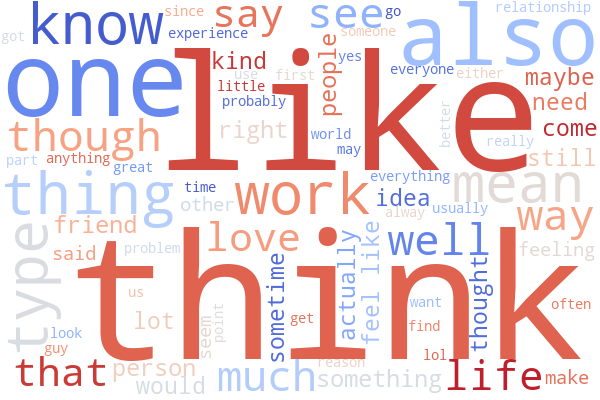

In [245]:
stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
attitude_text = df.loc[df['attitude'] == 'e', 'body'].str.cat()
wc.generate_from_text(attitude_text)
wc.to_image()

In [334]:
cols_list = pipe_attitude.named_steps.tfidf.get_feature_names()
filter_series = df.loc[df['attitude'] == 'e', 'body']


df_e = pd.DataFrame(pipe_attitude.named_steps.tfidf.transform(filter_series).todense(),
                    columns = cols_list)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']

filtered_columns = [i for i in df_e.columns if i not in stops]

df_att_bar = df_e.loc[:,filtered_columns]

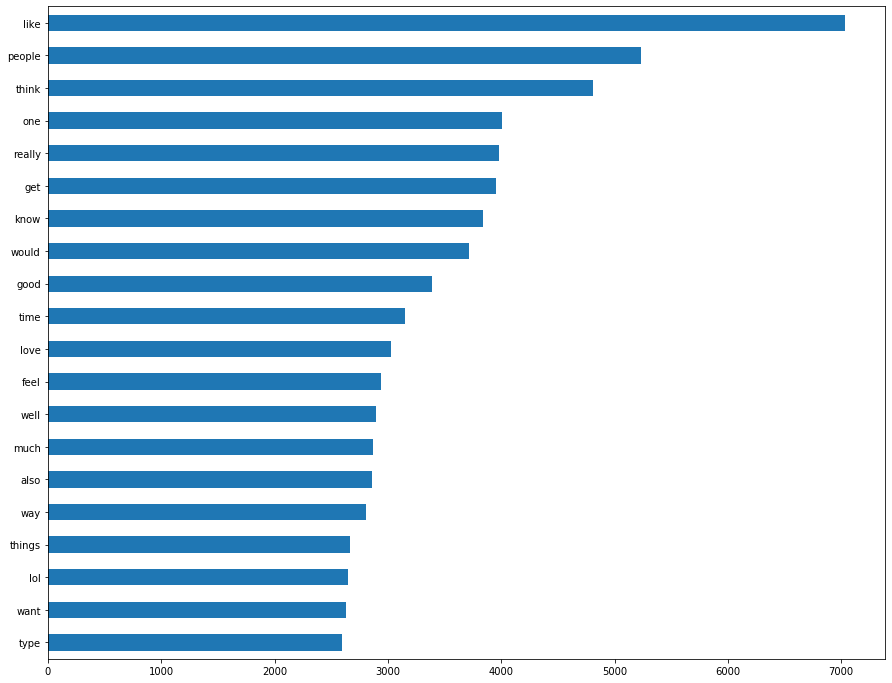

In [335]:
fig , ax = plt.subplots(figsize=(15,12))
df_att_bar.sum().sort_values().tail(20).plot.barh()

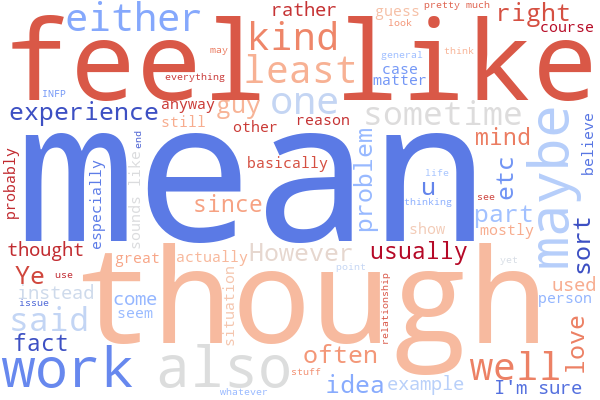

In [246]:
stops = list(stopwords.words('english')) + ['Ye', 'ENFP', 'INTJ', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
attitude_text = df.loc[df['attitude'] == 'i', 'body'].str.cat()
wc.generate_from_text(attitude_text)
wc.to_image()

In [345]:
cols_list = pipe_attitude.named_steps.tfidf.get_feature_names()
filter_series_i = df.loc[df['attitude'] == 'i', 'body']


df_i = pd.DataFrame(pipe_attitude.named_steps.tfidf.transform(filter_series_i).todense(),
                    columns = cols_list)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']

filtered_columns_i = [i for i in df_i.columns if i not in stops]

df_i_bar = df_i.loc[:,filtered_columns]

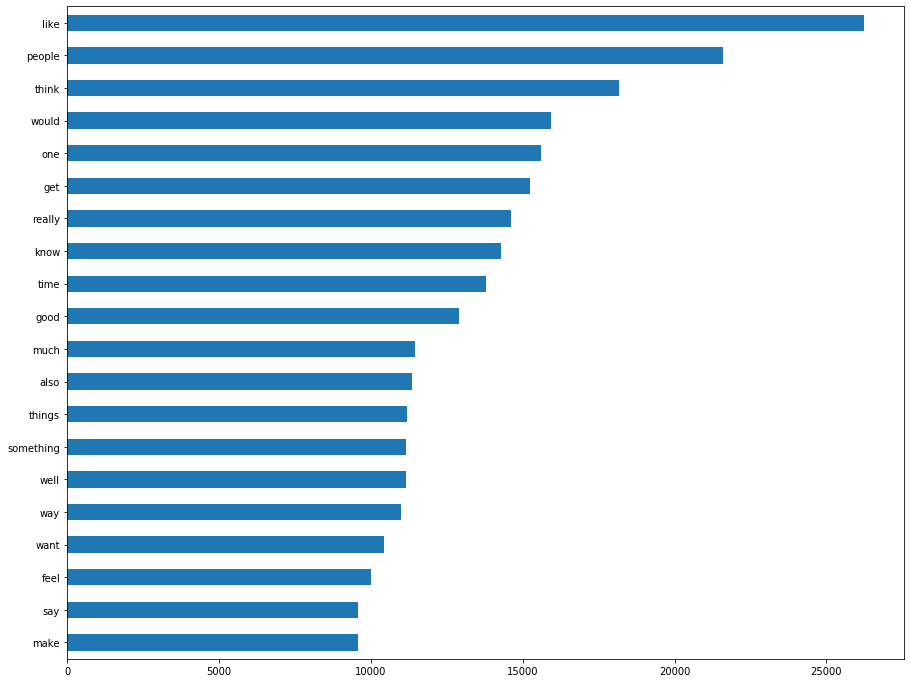

In [346]:
fig , ax = plt.subplots(figsize=(15,12))
df_i_bar.sum().sort_values().tail(20).plot.barh()

# Final Model for Perception - LogReg w/TFIDF Vectorizer

In [256]:
# Create train_test_split.

X = df['body']
y = df['perception']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 42)

In [257]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (764279,)
X_test shape: (376437,)


In [258]:
X_train_words = X_train.map(nlp_cleaning)
X_test_words = X_test.map(nlp_cleaning)

In [259]:
pipe_perception = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=259)),
    ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1'))
    ])

pipe_perception.fit(X_train_words, y_train)
    
preds = pipe_perception.predict(X_test_words)

In [260]:
print(f'Training Score: {pipe_perception.score(X_train_words, y_train)}')
print(f'Test Score: {pipe_perception.score(X_test_words, y_test)}')

Training Score: 0.9157166427443382
Test Score: 0.9157149801958894


In [261]:
y_test.value_counts()

n    344709
s     31728
Name: perception, dtype: int64

In [262]:
pipe_perception.named_steps['lr'].classes_

array(['n', 's'], dtype=object)

In [263]:
conf_cols = 'Predicted ' + pipe_perception.named_steps['lr'].classes_
conf_rows = 'Actual ' + pipe_perception.named_steps['lr'].classes_

conf_matr_perception = pd.DataFrame(confusion_matrix(y_test, preds), columns=conf_cols, index=conf_rows)
conf_matr_perception

,Predicted n,Predicted s
Actual n,344709,0
Actual s,31728,0


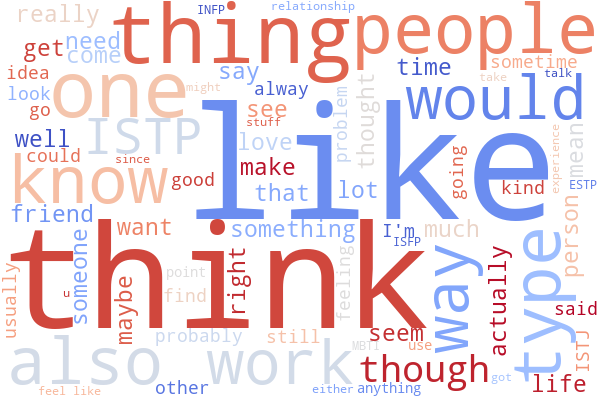

In [264]:
stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
perception_text = df.loc[df['perception'] == 's', 'body'].str.cat()
wc.generate_from_text(perception_text)
wc.to_image()

In [330]:
cols_list_2 = pipe_perception.named_steps.tfidf.get_feature_names()
filter_series_s = df.loc[df['perception'] == 's', 'body']


df_s = pd.DataFrame(pipe_perception.named_steps.tfidf.transform(filter_series_s).todense(),
                    columns = cols_list_2)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_s = [i for i in df_s.columns if i not in stops]

df_s_bar = df_s.loc[:,filtered_columns_s]

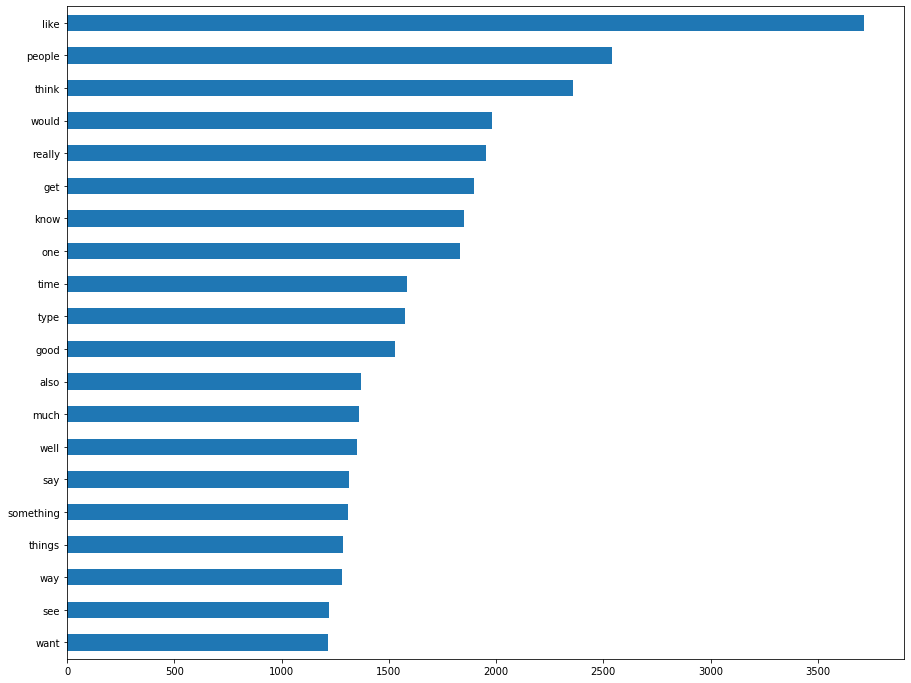

In [331]:
fig , ax = plt.subplots(figsize=(15,12))
df_s_bar.sum().sort_values().tail(20).plot.barh()

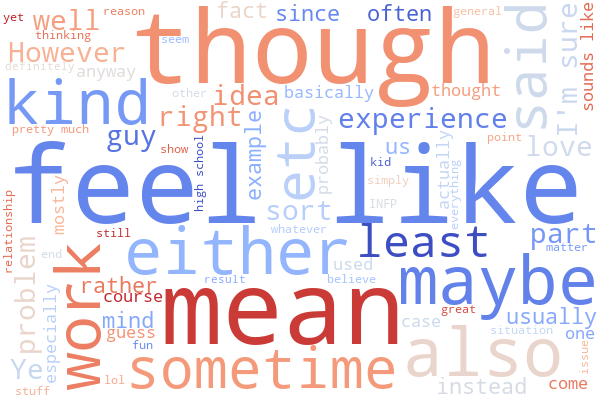

In [265]:
stops = list(stopwords.words('english')) + ['Ye', 'ENFP', 'INTJ', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
perception_text = df.loc[df['perception'] == 'n', 'body'].str.cat()
wc.generate_from_text(perception_text)
wc.to_image()

In [328]:
cols_list_2 = pipe_perception.named_steps.tfidf.get_feature_names()
filter_series_n = df.loc[df['perception'] == 'n', 'body']


df_n = pd.DataFrame(pipe_perception.named_steps.tfidf.transform(filter_series_n).todense(),
                    columns = cols_list_2)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_n = [i for i in df_n.columns if i not in stops]

df_n_bar = df_n.loc[:,filtered_columns_n]

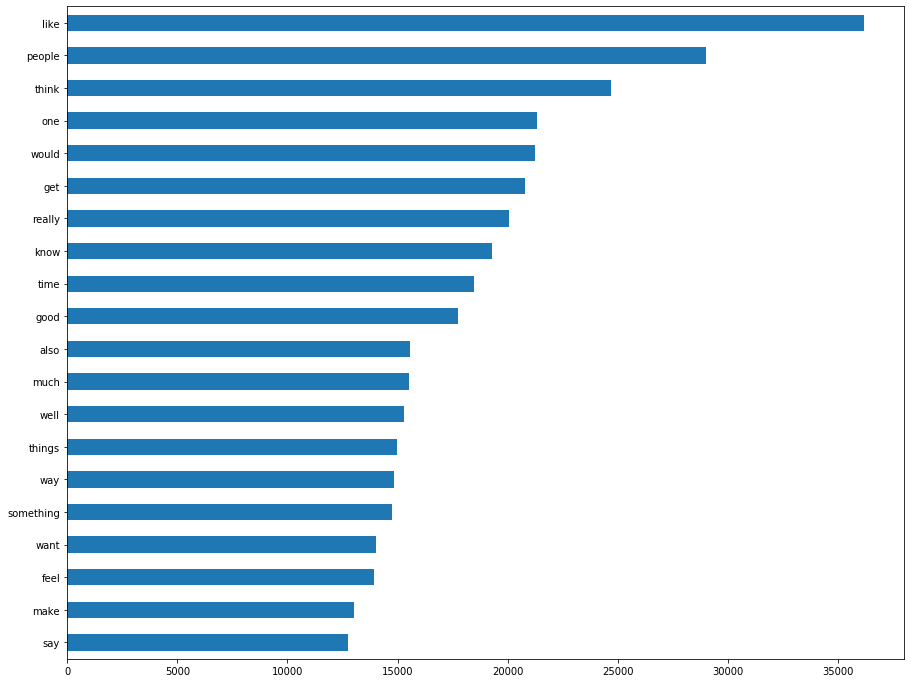

In [329]:
fig , ax = plt.subplots(figsize=(15,12))
df_n_bar.sum().sort_values().tail(20).plot.barh()

# Final Model for Judgment - LogReg w/TFIDF Vectorizer

In [266]:
# Create train_test_split.

X = df['body']
y = df['judgment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 42)

In [267]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (764279,)
X_test shape: (376437,)


In [268]:
X_train_words = X_train.map(nlp_cleaning)
X_test_words = X_test.map(nlp_cleaning)

In [269]:
pipe_judgment = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=750)),
    ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1'))
    ])

pipe_judgment.fit(X_train_words, y_train)
    
preds = pipe_judgment.predict(X_test_words)

In [270]:
print(f'Training Score: {pipe_judgment.score(X_train_words, y_train)}')
print(f'Test Score: {pipe_judgment.score(X_test_words, y_test)}')

Training Score: 0.7826971564049254
Test Score: 0.7827790573190202


In [271]:
y_test.value_counts()

t    291925
f     84512
Name: judgment, dtype: int64

In [272]:
pipe_judgment.named_steps['lr'].classes_

array(['f', 't'], dtype=object)

In [273]:
conf_cols = 'Predicted ' + pipe_judgment.named_steps['lr'].classes_
conf_rows = 'Actual ' + pipe_judgment.named_steps['lr'].classes_

conf_matr_judgment = pd.DataFrame(confusion_matrix(y_test, preds), columns=conf_cols, index=conf_rows)
conf_matr_judgment

,Predicted f,Predicted t
Actual f,8195,76317
Actual t,5453,286472


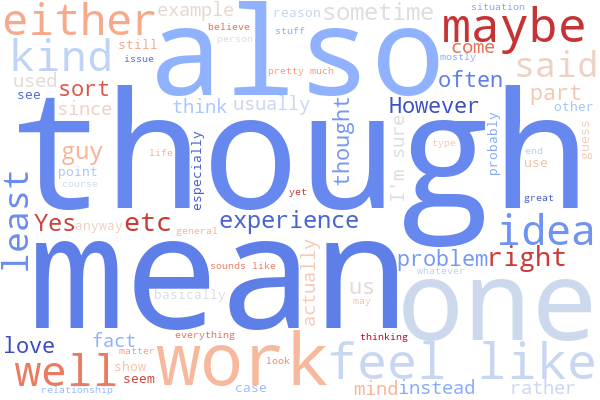

In [275]:
stops = list(stopwords.words('english')) + ['Ye', 'ENFP', 'INTJ', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
judgment_text = df.loc[df['judgment'] == 't', 'body'].str.cat()
wc.generate_from_text(judgment_text)
wc.to_image()

In [324]:
cols_list_3 = pipe_judgment.named_steps.tfidf.get_feature_names()
filter_series_t = df.loc[df['judgment'] == 't', 'body']


df_t = pd.DataFrame(pipe_judgment.named_steps.tfidf.transform(filter_series_t).todense(),
                    columns = cols_list_3)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_t = [i for i in df_t.columns if i not in stops]

df_t_bar = df_t.loc[:,filtered_columns_t]

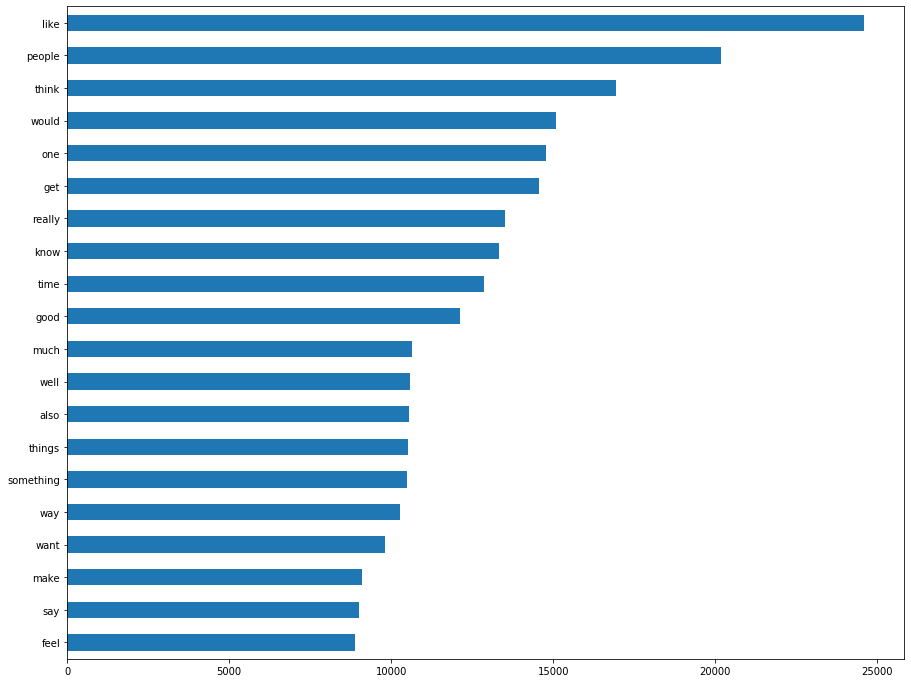

In [325]:
fig , ax = plt.subplots(figsize=(15,12))
df_t_bar.sum().sort_values().tail(20).plot.barh()

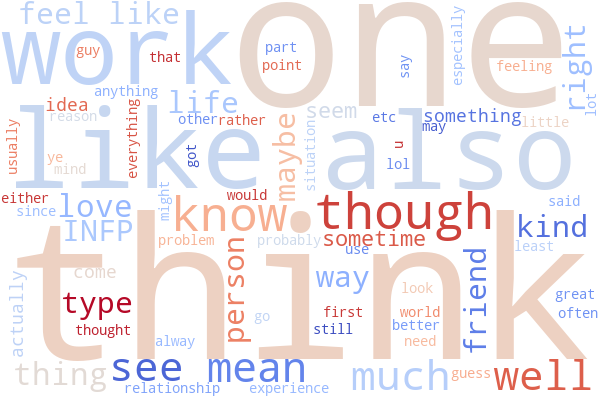

In [274]:
stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
judgment_text = df.loc[df['judgment'] == 'f', 'body'].str.cat()
wc.generate_from_text(judgment_text)
wc.to_image()

In [326]:
cols_list_3 = pipe_judgment.named_steps.tfidf.get_feature_names()
filter_series_f = df.loc[df['judgment'] == 'f', 'body']


df_f = pd.DataFrame(pipe_judgment.named_steps.tfidf.transform(filter_series_f).todense(),
                    columns = cols_list_3)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_f = [i for i in df_f.columns if i not in stops]

df_f_bar = df_f.loc[:,filtered_columns_f]

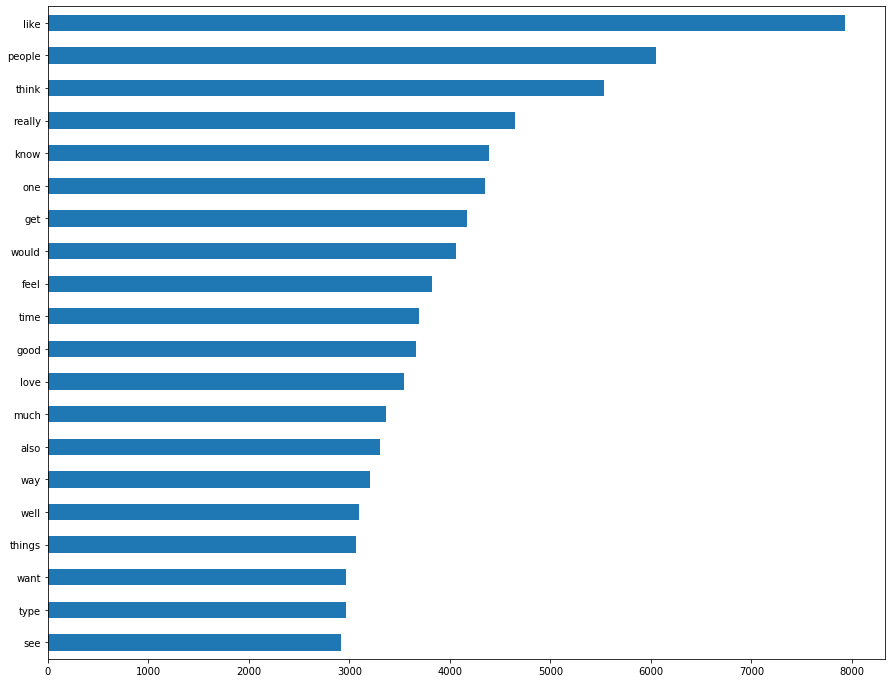

In [327]:
fig , ax = plt.subplots(figsize=(15,12))
df_f_bar.sum().sort_values().tail(20).plot.barh()

# Final Model for Lifestyle - LogReg w/CountVectorizer

In [276]:
# Create train_test_split.

X = df['body']
y = df['lifestyle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 42)

In [277]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (764279,)
X_test shape: (376437,)


In [278]:
X_train_words = X_train.map(nlp_cleaning)
X_test_words = X_test.map(nlp_cleaning)

In [279]:
pipe_lifestyle = Pipeline([
    ('cvec', CountVectorizer(max_features = 500)),
    ('lr', LogisticRegression(solver = 'liblinear', penalty = 'l1'))
])

pipe_lifestyle.fit(X_train_words, y_train)

preds = pipe_lifestyle.predict(X_test_words)

In [280]:
print(f'Training Score: {pipe_lifestyle.score(X_train_words, y_train)}')
print(f'Test Score: {pipe_lifestyle.score(X_test_words, y_test)}')

Training Score: 0.6280023394598045
Test Score: 0.6271328270069095


In [281]:
y_test.value_counts()

p    222456
j    153981
Name: lifestyle, dtype: int64

In [282]:
pipe_lifestyle.named_steps['lr'].classes_

array(['j', 'p'], dtype=object)

In [283]:
conf_cols = 'Predicted ' + pipe_lifestyle.named_steps['lr'].classes_
conf_rows = 'Actual ' + pipe_lifestyle.named_steps['lr'].classes_

conf_matr_lifestyle = pd.DataFrame(confusion_matrix(y_test, preds), columns=conf_cols, index=conf_rows)
conf_matr_lifestyle

,Predicted j,Predicted p
Actual j,25614,128367
Actual p,11994,210462


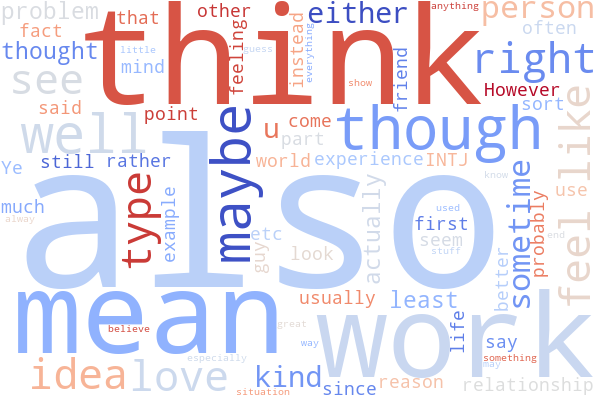

In [347]:
stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even', 'one']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
lifestyle_text = df.loc[df['lifestyle'] == 'j', 'body'].str.cat()
wc.generate_from_text(lifestyle_text)
wc.to_image()

In [340]:
cols_list_4 = pipe_lifestyle.named_steps.cvec.get_feature_names()
filter_series_j = df.loc[df['lifestyle'] == 'j', 'body']


df_j = pd.DataFrame(pipe_lifestyle.named_steps.cvec.transform(filter_series_j).todense(),
                    columns = cols_list_4)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_j = [i for i in df_j.columns if i not in stops]

df_j_bar = df_j.loc[:,filtered_columns_j]

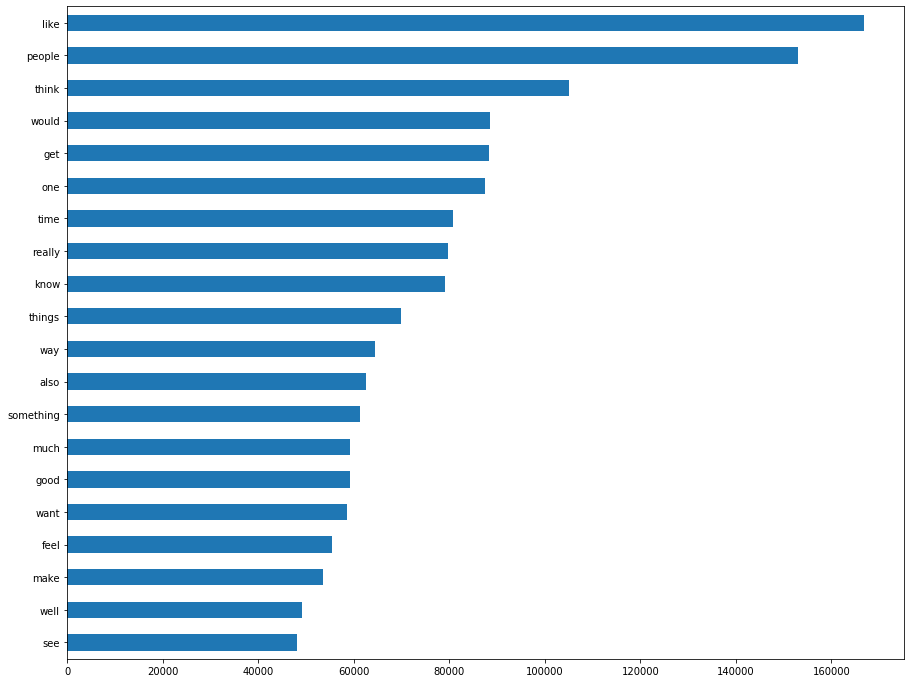

In [341]:
fig , ax = plt.subplots(figsize=(15,12))
df_j_bar.sum().sort_values().tail(20).plot.barh()

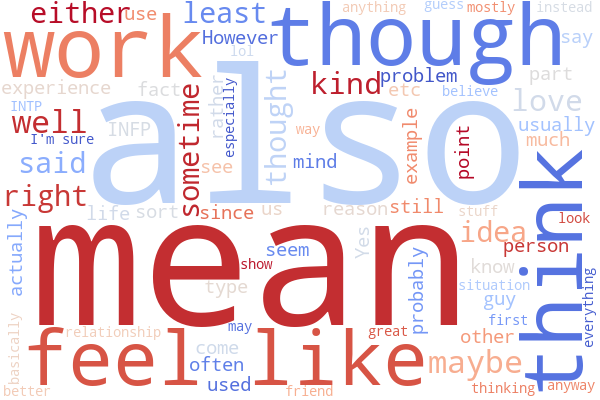

In [ ]:
stops = list(stopwords.words('english')) + ['Ye', 'ENFP', 'INTJ', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ', 'even', 'one']
wc = wordcloud.WordCloud(width=600, height=400, max_words=75, stopwords=stops, background_color='white', colormap = 'coolwarm')
lifestyle_text = df.loc[df['lifestyle'] == 'p', 'body'].str.cat()
wc.generate_from_text(lifestyle_text)
wc.to_image()

In [342]:
cols_list_4 = pipe_lifestyle.named_steps.cvec.get_feature_names()
filter_series_p = df.loc[df['lifestyle'] == 'p', 'body']


df_p = pd.DataFrame(pipe_lifestyle.named_steps.cvec.transform(filter_series_p).todense(),
                    columns = cols_list_4)

stops = list(stopwords.words('english')) + ['ENFP', 'INTJ', 'ye', 'gt', 'INTP', 'ENTJ', 'ENTP', 'com', 'INFJ',
                                            'even', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INFP', 'ISFJ'
                                            'ISFP', 'ISTJ', 'ISTP', 'enfp', 'intj', 'intp', 'entj', 'entp',
                                            'infj', 'enfj', 'estp', 'estj', 'esfp', 'esfj', 'infp', 'isfj',
                                            'isfp', 'istj', 'istp']
filtered_columns_p = [i for i in df_p.columns if i not in stops]

df_p_bar = df_p.loc[:,filtered_columns_p]

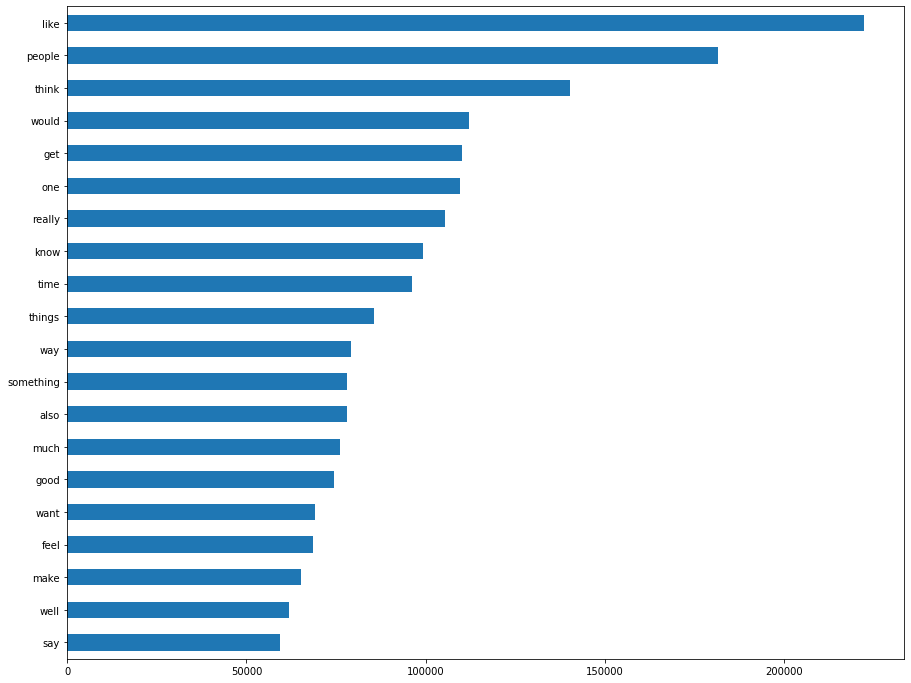

In [343]:
fig , ax = plt.subplots(figsize=(15,12))
df_p_bar.sum().sort_values().tail(20).plot.barh()